## Our Goal: Data Preprocessing requied to create a Predictive Model and Building a Predictive Model. 

## File used: leap_in_40pc_df


## Algoritm Used for Model: Random Forest Classifier.

## Summary of process: 
* <b>step 1:</b> Visualise the distribution of the data. 
* <b>Step 2:</b> Normalize the distribution of the data. 
* <b>Step 3:</b> Convert the categorical variable to numerical variable. 
* <b>Step 4:</b> Feature selection using forward selection. 
* <b>Step 5:</b> Splitting the Data into Training and Test set. 
* <b>Step 6:</b> Create the Baseline Model using the selected subset of features.
    *  Testing and verification of Baseline Model. 
* <b>Step 7:</b> Create the Improved Model with Hyperparameter Tuning.
    *  Testing and verification of Improved Model.
* <b>Step 8:</b> Deciding whether to Accept or Reject the Improved Model. 
    


# Skewness testing matrix
### Fairly Symmetrical	-0.5 to 0.5 
### Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
### Highly Skewed	< -1.0 and > 1.0


In [835]:
# installing some libraries.
# !pip install ipynb
# !pip install mlxtend
# !pip install ensemble


In [836]:
import pandas as pd
import numpy as np

# Libraries for data preporcessing and model building

# Data Normalisation BoxCox Library
from scipy.stats import boxcox 

# Data preprocessing library
from sklearn.preprocessing import LabelEncoder 

# Training and Testing set splitting library
from sklearn.model_selection import train_test_split 

# Feature selection library
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 

# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RFC 

# To check Model's accuracy
from sklearn.metrics import accuracy_score 

# Model Evaluation using CM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

# Classification Report of the Model.
from sklearn.metrics import classification_report # Classification Report of the Model.

#Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [837]:
#importing the dataframes "leap_in_40pc_df" from notebook called "leap_in_df_with_40pc"
from ipynb.fs.full.leap_in_df_with_40pc import leap_in_40pc_df


# from ipynb.fs.full.leap_in_60_pc import leap_in_60pc_df
# from ipynb.fs.full.leap_in_df_100pc import leap_in_total_df

### Re-arranging columns in 40% and 60% datasets

In [838]:
# Printing the columns of the dataframe.
leap_in_40pc_df.columns

Index(['membership_number', 'total_funded_amount_40pc', 'allocation',
       'plan_period', 'plan_progress_40pc', 'plan_progress_40pc_date',
       'plan_start_date', 'plan_end_date', 'plan_key', 'l2_key', 'frequency',
       'start_date', 'end_date', 'funded_amount', 'units', 'l3_id',
       'invoice_number', 'invoice_date', 'abn', 'l3_reference_number',
       'l3_key', 'l3_name', 'l3_description', 'l2_reference_number', 'l2_name',
       'l1_name', 'l1_id', 'member_key', 'Id', 'YOB', 'Disability', 'name',
       'uom', 'registration_group', 'Postcode', 'spending_behaviour'],
      dtype='object')

In [839]:
# Rearranging the columns is the same order as in the order below. 
columns_name_40pc = [
    
    'membership_number', 'YOB', 'total_funded_amount_40pc', 'allocation', 'frequency',
    'spending_behaviour','Disability', 'abn', 'Postcode', 'plan_period', 'plan_progress_40pc',
    'plan_progress_40pc_date', 'plan_key', 'l2_key','l1_name', 'l3_name', 'l3_description'
]

# Applying the order
leap_in_40pc_df = leap_in_40pc_df.reindex(columns = columns_name_40pc)


## Step 1: Visualizing the distribution of data.

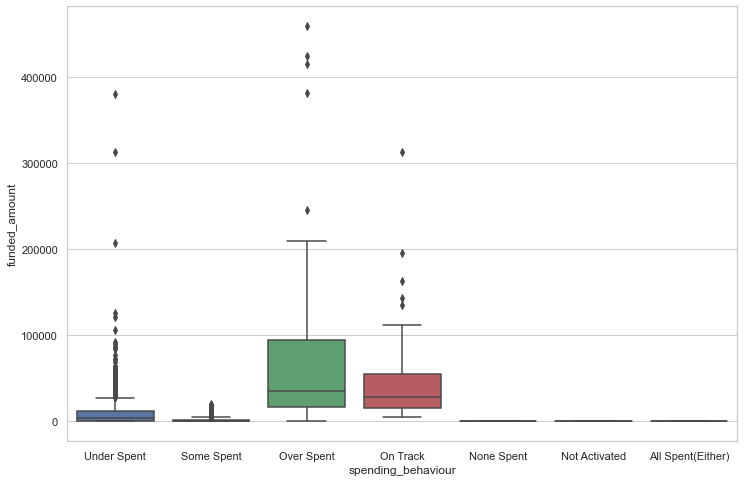

In [840]:
sns.set_style("whitegrid")
# f=plt.figure(figsize=(10,4))
ax=sns.boxplot(x = 'spending_behaviour', y = 'funded_amount', data = leap_in_total_df)
# f.tight_layout()

### Summary: Too many outliers detected. Need to be fixed to have a good model. 

### Checkinf Distribution of "total_funded_amount_40pc" and "allocation" using KDE plot. 

<AxesSubplot:xlabel='total_funded_amount_40pc', ylabel='Density'>

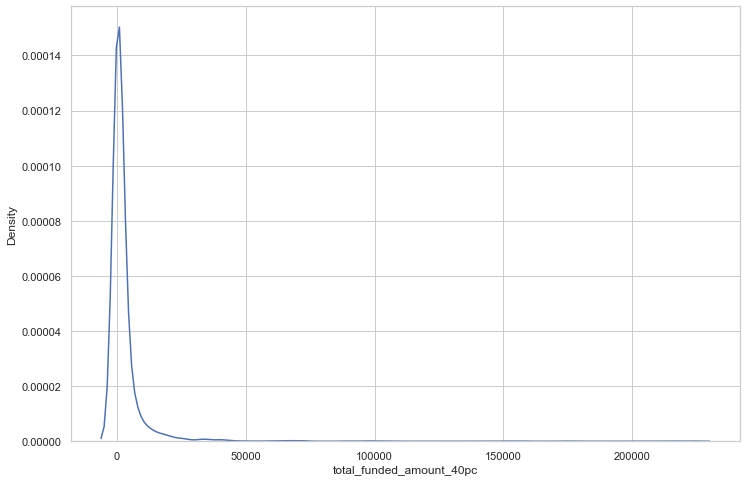

In [841]:
# plt.figure(figsize=(10,4))
sns.kdeplot(leap_in_40pc_df.total_funded_amount_40pc)

In [842]:
# Desribing the total_funded_amount_40pc column 
leap_in_40pc_df.total_funded_amount_40pc.describe()

count      3131.000000
mean       2925.566583
std       10170.190135
min           0.000000
25%          39.395000
50%         537.780000
75%        2142.575000
max      223991.710000
Name: total_funded_amount_40pc, dtype: float64

### Summary: Highly right skewed or positively skewed. Required to be fixed. 

<AxesSubplot:xlabel='allocation', ylabel='Density'>

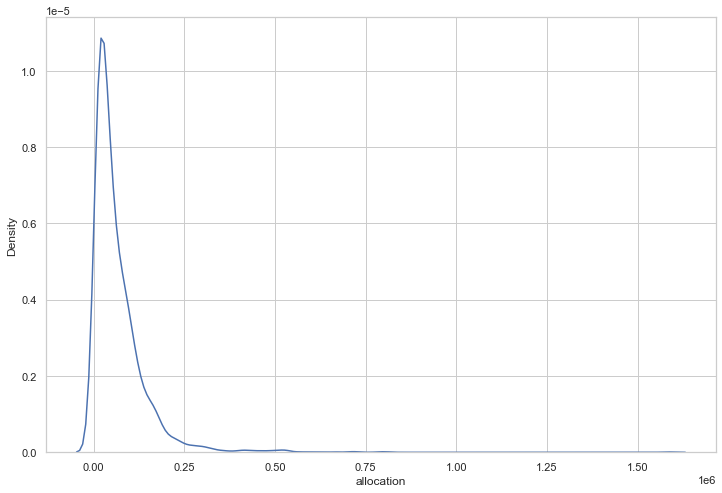

In [843]:
# plt.figure(figsize=(10,4))
sns.kdeplot(leap_in_40pc_df.allocation)

In [844]:
# Desribing the allocation column 
leap_in_40pc_df.allocation.describe()

count    3.131000e+03
mean     6.670181e+04
std      7.865030e+04
min      0.000000e+00
25%      2.004958e+04
50%      4.343618e+04
75%      8.812641e+04
max      1.583999e+06
Name: allocation, dtype: float64

### Summary: Highly right skewed or positively skewed. Required to be fixed. 

### Highly Right Skewed both "total_funded_amount_40pc" and "allocation" required to be normalised.

In [845]:
# checking allocation == 0

leap_in_40pc_df.loc[leap_in_40pc_df.allocation == 0]

,membership_number,YOB,total_funded_amount_40pc,allocation,frequency,spending_behaviour,Disability,abn,Postcode,plan_period,plan_progress_40pc,plan_progress_40pc_date,plan_key,l2_key,l1_name,l3_name,l3_description
2945,202716922,1976.0,0.0,0.0,Either,All Spent(Either),None,835743494.0,4152,30,12,2018-10-03,f889db40-e52b-11ea-abc2-2bb0308caa66,7d0af57b-f597-11e9-bfb4-022d4762bb3c,Capacity Building,"Individual Assessment, Therapy And/Or Training...","Assessment, therapy, training, fitting and any..."


In [846]:
#  checking total_funded_amount_40pc == 0

leap_in_40pc_df.loc[leap_in_40pc_df.total_funded_amount_40pc==0].shape

(732, 17)

### Summary: 
#### There is funded_amount ==0 right from original dataset "Invoices" to "40,60 and 100% plan period" dataset.
#### The spending behaviours is also affected by this value.
#### Since, the data distribution says that data is  highly densed close to Zero and goes upto more than 500K, the distribution
#### is highly Skewed towards right ( +ve ) side. 

### Solutin:
#### Normalise the distribution. 

## Step 2: Normalization

#### Step 2.1: Normalizing "total_funded_amount_40pc_log"
* Used square root technique ( commented because it did not work )
* Used BoxCox technique ( commented because it did not work )
* <b><i>Used log technique and it worked </i></b>

#### Step 2.3: Normalising " alloctaion" 
* Used log technique ( commented because it did not work )
* Used cubicroot technique ( commented because it did not work )
* <b><i>Used Box Cox technique and it worked </i></b>
       
    
    

### Step 2.1: Normalizing "total_funded_amount_40pc_log"

In [847]:
# Normalisation using squartroot technique. 

# leap_in_40pc_df['total_funded_amount_40pc_sq']= np.sqrt(leap_in_40pc_df['total_funded_amount_40pc'])


In [848]:
# Getting column index of 'total_funded_amount_40pc' column required by boxcox
# leap_in_40pc_df.columns.get_loc("total_funded_amount_40pc")

# using BoxCox
# leap_in_40pc_df['total_funded_amount_40pc_bc']=boxcox(leap_in_40pc_df.total_funded_amount_40pc+1)[0]

# using log technique.
leap_in_40pc_df['total_funded_amount_40pc_log']=np.log(leap_in_40pc_df.total_funded_amount_40pc+1)


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_funded_amount_40pc_log', ylabel='Density'>

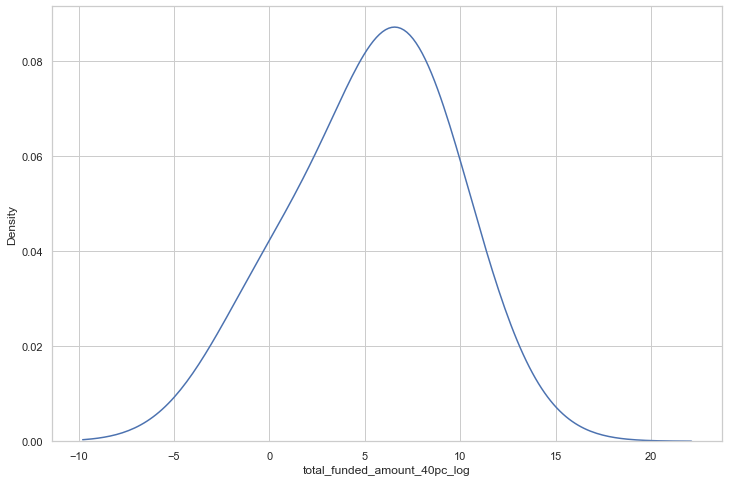

In [849]:
# checking KDE plot after transformation.
sns.kdeplot(leap_in_40pc_df.total_funded_amount_40pc_log, bw=1)

<AxesSubplot:ylabel='total_funded_amount_40pc_log'>

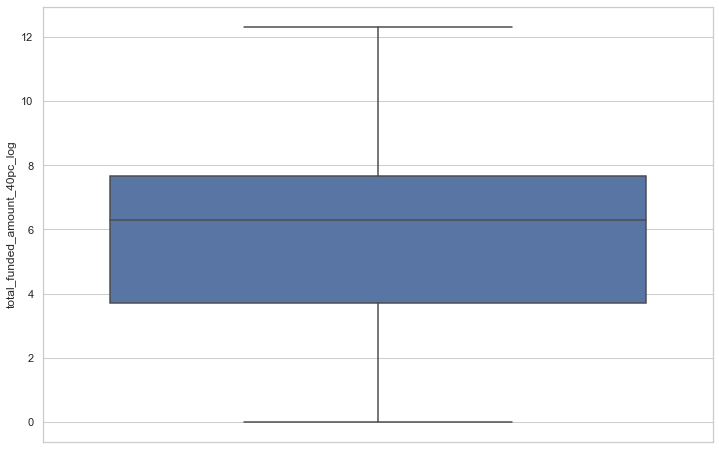

In [850]:
# Checking Box plot after transformation
sns.boxplot(data=leap_in_40pc_df,y='total_funded_amount_40pc_log')

In [851]:
leap_in_40pc_df.total_funded_amount_40pc_log.describe()

count    3131.000000
mean        5.309096
std         3.262110
min         0.000000
25%         3.698618
50%         6.289307
75%         7.670230
max        12.319369
Name: total_funded_amount_40pc_log, dtype: float64

### Summary: From KDE and Box Plot, Data Distribution looks good. 

In [852]:
# Checking Skewness value 
leap_in_40pc_df.agg(['skew']).transpose()

,skew
membership_number,0.021899
YOB,-0.018498
total_funded_amount_40pc,12.066792
allocation,5.161456
abn,-0.032313
plan_period,-0.387628
plan_progress_40pc,-0.387225
total_funded_amount_40pc_log,-0.631443


# Conclusion: 
### Having seen the data distribuion and through KDE and Box plot, log Normalisation looks much better
### skewness for allocation_bc = 0.026 which is fairly symitrical so we choose allocation_bc





### Step 2.2: Conducting test for "allocation".

In [853]:

leap_in_40pc_df['allocation_bc']=boxcox(leap_in_40pc_df.allocation+1)[0]
# leap_in_40pc_df['allocation_log']=np.log(leap_in_40pc_df.allocation+1)
# leap_in_40pc_df['allocation_cu']=(leap_in_40pc_df.allocation**(1/3))

In [854]:
# Checking skewness value
leap_in_40pc_df['allocation_bc'].describe()

count    3131.000000
mean       20.612897
std         3.338435
min         0.000000
25%        18.142088
50%        20.589280
75%        23.022184
max        35.221682
Name: allocation_bc, dtype: float64

In [856]:
# Trying Cubic root
# leap_in_40pc_df['allocation_cu'].describe()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='allocation_bc', ylabel='Density'>

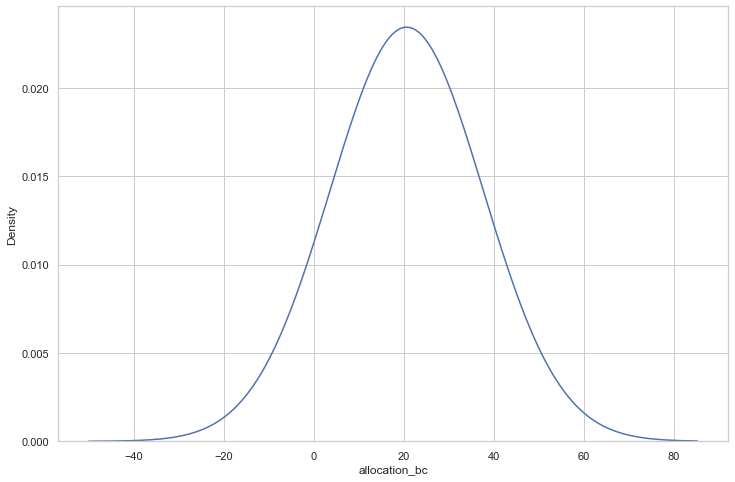

In [857]:
# KDE plot 
sns.kdeplot(leap_in_40pc_df['allocation_bc'], bw=5)

In [858]:
leap_in_40pc_df.agg(['skew']).transpose()

,skew
membership_number,0.021899
YOB,-0.018498
total_funded_amount_40pc,12.066792
allocation,5.161456
abn,-0.032313
plan_period,-0.387628
plan_progress_40pc,-0.387225
total_funded_amount_40pc_log,-0.631443
allocation_bc,0.026300


<AxesSubplot:ylabel='allocation_bc'>

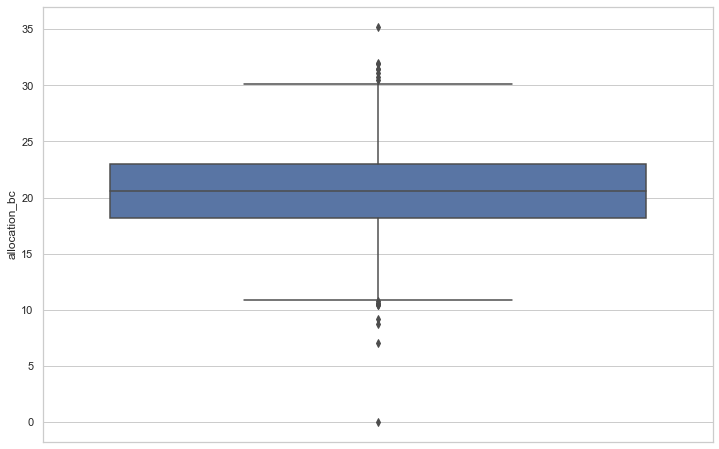

In [859]:
# Box plot for allocation_bc
sns.boxplot(data=leap_in_40pc_df, y='allocation_bc')

In [860]:
leap_in_40pc_df.describe()

,membership_number,YOB,total_funded_amount_40pc,allocation,abn,plan_period,plan_progress_40pc,total_funded_amount_40pc_log,allocation_bc
count,3.131000e+03,3130.00000,3131.000000,3.131000e+03,3.046000e+03,3131.000000,3131.000000,3131.000000,3131.000000
mean,4.928775e+08,1969.35016,2925.566583,6.670181e+04,5.469008e+10,279.511977,111.421591,5.309096,20.612897
std,2.867999e+08,28.57538,10170.190135,7.865030e+04,2.645435e+10,114.827817,45.937809,3.262110,3.338435
min,4.869000e+03,1920.00000,0.000000,0.000000e+00,6.484535e+07,30.000000,12.000000,0.000000,0.000000
25%,2.379604e+08,1945.00000,39.395000,2.004958e+04,3.233802e+10,180.000000,72.000000,3.698618,18.142088
50%,4.952695e+08,1970.00000,537.780000,4.343618e+04,5.512385e+10,336.000000,134.000000,6.289307,20.589280
75%,7.388606e+08,1993.00000,2142.575000,8.812641e+04,7.851098e+10,362.000000,144.000000,7.670230,23.022184
max,9.989876e+08,2019.00000,223991.710000,1.583999e+06,9.980455e+10,843.000000,337.000000,12.319369,35.221682


In [861]:
# col_del = ['allocation_log','allocation_sq','allocation_cu','allocation_lmr','total_funded_amount_40pc_bc',
#                     'total_funded_amount_40pc_tanh','total_funded_amount_40pc_sq']
# leap_in_40pc_df.drop(col_del, inplace= True, axis = 1)

In [862]:
# leap_in_40pc_df['plan_period_bc']=boxcox(leap_in_40pc_df.plan_period)[0]
# leap_in_40pc_df['plan_period_log']=np.log(leap_in_40pc_df.plan_period)
# leap_in_40pc_df['plan_period_sq']=np.sqrt(leap_in_40pc_df.plan_period)

In [863]:
# Summary: From above graph, It shows that data are normally distributed. 

In [864]:
leap_in_40pc_df.describe()

,membership_number,YOB,total_funded_amount_40pc,allocation,abn,plan_period,plan_progress_40pc,total_funded_amount_40pc_log,allocation_bc
count,3.131000e+03,3130.00000,3131.000000,3.131000e+03,3.046000e+03,3131.000000,3131.000000,3131.000000,3131.000000
mean,4.928775e+08,1969.35016,2925.566583,6.670181e+04,5.469008e+10,279.511977,111.421591,5.309096,20.612897
std,2.867999e+08,28.57538,10170.190135,7.865030e+04,2.645435e+10,114.827817,45.937809,3.262110,3.338435
min,4.869000e+03,1920.00000,0.000000,0.000000e+00,6.484535e+07,30.000000,12.000000,0.000000,0.000000
25%,2.379604e+08,1945.00000,39.395000,2.004958e+04,3.233802e+10,180.000000,72.000000,3.698618,18.142088
50%,4.952695e+08,1970.00000,537.780000,4.343618e+04,5.512385e+10,336.000000,134.000000,6.289307,20.589280
75%,7.388606e+08,1993.00000,2142.575000,8.812641e+04,7.851098e+10,362.000000,144.000000,7.670230,23.022184
max,9.989876e+08,2019.00000,223991.710000,1.583999e+06,9.980455e+10,843.000000,337.000000,12.319369,35.221682


In [865]:
# dropping column 'total_funded_amount_40pc','allocation' which is skewedly distributed.

# leap_in_40pc_df.drop(['total_funded_amount_40pc','allocation'], inplace= True, axis = 1)

#Dropping some more columns = ['plan_key', 'l2_key', 'l1_name', 'l3_name','l3_description']
# leap_in_40pc_df.drop(['plan_key', 'l2_key', 'l1_name', 'l3_name','l3_description'], inplace= True, axis = 1)
# leap_in_40pc_df.drop('plan_progress_40pc_date', inplace= True, axis = 1)



# Data proprocessing with leap_in_40pc_df

## Creating leap_in_model dataframe for model 

## from above statistics, repeated column perspective and intutively we can delete the following columns:
##### ['total_funded_amount_40pc' , 'allocation', 'Disability', 'abn', 'Postcode', 'plan_progress_40pc_date','plan_key', 'l2_key', 'l1_name', 'l3_name', 'l3_description']



In [866]:
# Dropping columns and Creating leap_in_model dataframe.
drop_columns = [
    'membership_number','total_funded_amount_40pc' , 'allocation', 'Disability', 'abn', 'Postcode', 
    'plan_progress_40pc_date','plan_key', 'l3_name', 'l3_description'
]
leap_in_model = leap_in_40pc_df.drop(drop_columns, axis = 1)

In [867]:
leap_in_model.head(3)

,YOB,frequency,spending_behaviour,plan_period,plan_progress_40pc,l2_key,l1_name,total_funded_amount_40pc_log,allocation_bc
0,2011.0,Recurring,Under Spent,139,55,7d0af53b-f597-11e9-bfb4-022d4762bb3c,Core,5.489144,20.882477
1,1982.0,Recurring,Under Spent,64,25,7d0af53b-f597-11e9-bfb4-022d4762bb3c,Core,6.815212,17.541771
2,1962.0,Either,None Spent,169,67,7d0af57b-f597-11e9-bfb4-022d4762bb3c,Capacity Building,0.000000,23.731636


In [868]:
leap_in_model.spending_behaviour.value_counts()

Under Spent          1189
Some Spent           1185
None Spent            463
Not Activated         268
Over Spent             14
On Track               11
All Spent(Either)       1
Name: spending_behaviour, dtype: int64

In [869]:
# Dropping rows All Spent(Either) column 

leap_in_model = leap_in_model.loc[leap_in_model.spending_behaviour != 'All Spent(Either)']

# Deleting row with null value. 

In [870]:
leap_in_model.isna().sum()

YOB                             1
frequency                       0
spending_behaviour              0
plan_period                     0
plan_progress_40pc              0
l2_key                          0
l1_name                         0
total_funded_amount_40pc_log    0
allocation_bc                   0
dtype: int64

In [871]:
# Dropping missing values 
leap_in_model.dropna(inplace=True)


In [872]:
leap_in_model.isna().sum()

YOB                             0
frequency                       0
spending_behaviour              0
plan_period                     0
plan_progress_40pc              0
l2_key                          0
l1_name                         0
total_funded_amount_40pc_log    0
allocation_bc                   0
dtype: int64

## Step 3: Now, Label encoding frequency and spending_behaviour columns

In [873]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning the label encoded values of frequency to frequency_le 
leap_in_model['frequency_le'] = labelencoder.fit_transform(leap_in_model['frequency'])

# Assigning the label encoded values of l2_key to l2_key_le 
leap_in_model['l2_key_le'] = labelencoder.fit_transform(leap_in_model['l2_key'])

# Assigning the label encoded values of l1_name to l1_name_le 
leap_in_model['l1_name_le'] = labelencoder.fit_transform(leap_in_model['l1_name'])

# Assigning the label encoded values of spending_behaviour to spending_behaviour_le 
leap_in_model['spending_behaviour_le'] = labelencoder.fit_transform(leap_in_model['spending_behaviour'])



## Step 4:  Feature Selection using Wrapper Method (Forward selection)

## Step 5:  Split the dataset into feature/independent variable and target/dependent variable set. 
### our target variable is spending_behaviour_le 

In [874]:
# Dropping columns ['frequency', 'spending_behaviour'] and creating leap_in_model
leap_in_model = leap_in_model.drop([ 'l2_key','l1_name','frequency', 'spending_behaviour'], axis =1)


In [875]:
leap_in_model.head()

,YOB,plan_period,plan_progress_40pc,total_funded_amount_40pc_log,allocation_bc,frequency_le,l2_key_le,l1_name_le,spending_behaviour_le
0,2011.0,139,55,5.489144,20.882477,1,1,1,5
1,1982.0,64,25,6.815212,17.541771,1,1,1,5
2,1962.0,169,67,0.000000,23.731636,0,3,0,0
3,1976.0,299,119,5.190175,22.822980,0,1,1,4
4,1976.0,299,119,9.055598,22.822980,1,1,1,5


### Extracting independent variable and dependent variables:

In [876]:
# Extracting features only
features= leap_in_model.iloc[:,0:8]

# Extracting target only
target= leap_in_model.iloc[:, -1]

In [877]:
features.shape

(3129, 8)

In [878]:
# stratified train and test split of data.
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = .25,
                                                 random_state = 10, stratify = target)



### Feature Selection:

In [879]:
# Sequential Forward Selection(sfs)
sfs = SFS(RFC(n_jobs= -1),
          k_features=(1,8),
          forward=True,
          floating=False,
          verbose =2,
          scoring = 'accuracy',
          cv = 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.3s finished

[2022-06-19 15:02:48] Features: 1/8 -- score: 0.7583123894206778[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.1s finished

[2022-06-19 15:02:57] Features: 2/8 -- score: 0.9846527242208409[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.6s finished

[2022-06-19 15:03:04] Features: 3/8 -- score: 0.9923268157691785[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [880]:
sfs.k_feature_names_

('total_funded_amount_40pc_log', 'allocation_bc', 'frequency_le')

In [881]:
sfs.k_score_

0.9923268157691785

### Outcome of feature selection:

In [882]:
# Lets see the result in the form of a dataframe. 

feature_metric = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
feature_metric

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.7574468085106383, 0.7590618336886994, 0.759...",0.758312,"(frequency_le,)",0.001198,0.000932,0.000466
2,"(3, 5)","[0.9893617021276596, 0.9893390191897654, 0.974...",0.984653,"(total_funded_amount_40pc_log, frequency_le)",0.007235,0.005629,0.002814
3,"(3, 4, 5)","[0.9936170212765958, 0.9936034115138592, 0.991...",0.992327,"(total_funded_amount_40pc_log, allocation_bc, ...",0.001347,0.001048,0.000524
4,"(3, 4, 5, 7)","[0.9936170212765958, 0.9936034115138592, 0.991...",0.992327,"(total_funded_amount_40pc_log, allocation_bc, ...",0.001347,0.001048,0.000524
5,"(0, 3, 4, 5, 7)","[0.9936170212765958, 0.9914712153518124, 0.991...",0.9919,"(YOB, total_funded_amount_40pc_log, allocation...",0.001103,0.000858,0.000429
6,"(0, 1, 3, 4, 5, 7)","[0.9914893617021276, 0.9936034115138592, 0.991...",0.991475,"(YOB, plan_period, total_funded_amount_40pc_lo...",0.001733,0.001349,0.000674
7,"(0, 1, 2, 3, 4, 5, 7)","[0.9914893617021276, 0.9914712153518124, 0.991...",0.991048,"(YOB, plan_period, plan_progress_40pc, total_f...",0.001099,0.000855,0.000427
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.9914893617021276, 0.9914712153518124, 0.991...",0.991048,"(YOB, plan_period, plan_progress_40pc, total_f...",0.001099,0.000855,0.000427


In [883]:
# feature_metric.feature_idx
feature_metric.feature_names[8]

('YOB',
 'plan_period',
 'plan_progress_40pc',
 'total_funded_amount_40pc_log',
 'allocation_bc',
 'frequency_le',
 'l2_key_le',
 'l1_name_le')

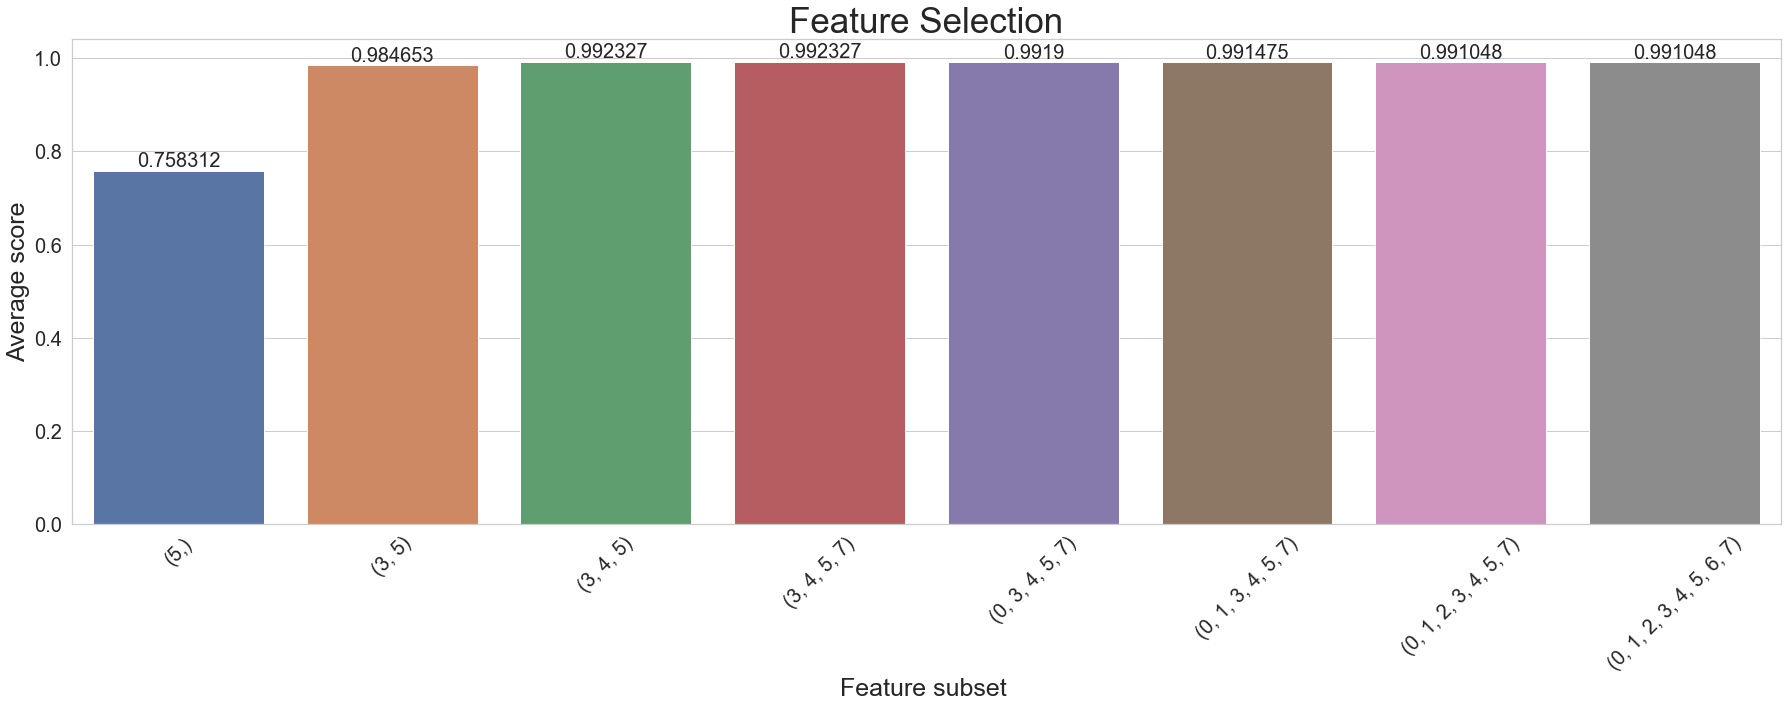

In [884]:
# plotting the feature selection dataframe.
plt.figure(figsize=(25,10))
ax=sns.barplot(x='feature_idx', y='avg_score', data =feature_metric)
ax.bar_label(ax.containers[0], fontsize =20)
ax.set_title("Feature Selection",fontsize=35)
ax.set_xlabel("Feature subset ",fontsize=25)
ax.set_ylabel("Average score",fontsize=25)
ax.tick_params(labelsize=20,axis='both')
plt.xticks(rotation=45)
plt.tight_layout()


### Building Baseline Model with all features: ( Just for testing purpose and Hence, commented out)

#### Training Model:

In [885]:
# # RFC is our RandomForestClassifier:
# #Instantiate the classifier as 'baseline_model'
# baseline_model = RFC() # with default Hyperparameter
# baseline_model.fit(X_train, y_train)

### Testing MOdel

In [886]:
# Testing the Model
# prediction_test = baseline_model.predict(X_test)

In [887]:
# printing the accuracy of the model
# print(accuracy_score(y_test, prediction_test))

### Training and Testing accuracy:

In [888]:
# # Accuracy on Training
# print("Training Accuracy is: ", baseline_model.score(X_train, y_train))
# # Accuracy on Testing
# print("Testing Accuracy is: ", baseline_model.score(X_test, y_test))


### Evaluating Baseline Model usng Confusion Matrix

In [889]:
# # Plot the confusion matrix 
# cm = confusion_matrix(y_test,y_predict, labels=baseline_model.classes_)

# # ploting with labels
# disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
# sns.set(rc={'figure.figsize':(12,8)})
# disp_cm.plot()

# showing the matrix
# plt.figure(figsize=(25,18))
# plt.show()

In [890]:
# printing label to spending behaviour
# list(labelencoder.inverse_transform([0, 1, 2,3,4,5]))

In [891]:
# Printing classification Report:
# print(classification_report(y_test, y_predict))


In [892]:
# leap_in_40pc_df.spending_behaviour.unique()

## Step 6: Building Baseline Model with selected features: YOB, total_funded_amount_40pc_log, allocation_bc, frequency_le 


In [893]:
# Keeping only selected features in the feature set and dropping the following columns. 
drop_cols = ['plan_period', 'plan_progress_40pc','l2_key_le', 'l1_name_le']

# extracting only selected feature set and dropping the rest. 
features_selected = features.drop(drop_cols, axis =1)



In [894]:
# stratified train and test split of data.
X_se_train,X_se_test,y_se_train,y_se_test = train_test_split(features_selected,target,test_size = .25,
                                                 random_state = 10, stratify = target)
print(X_se_train.shape,X_se_test.shape)


(2346, 4) (783, 4)


In [895]:
#Instantiate the classifier as 'RFC_classifier' 
model_selected_baseline = RFC()

#Training the model
model_selected_baseline.fit(X_se_train, y_se_train)

RandomForestClassifier()

In [896]:
# Testing the model
y_se_predict = model_selected_baseline.predict(X_se_test)

# printing the accuracy of the model
print("The effecency of baseline model is {}".format(accuracy_score(y_se_test, y_se_predict)))

The effecency of baseline model is 0.9910600255427842


## Summary: The Baseline Model is Trained and Tested and got the accuracy of 0.9910600255427842

## Step 6.1: Evaluating Baseline Model:

### Checking Training vs. Test Accuracy

In [905]:
# Accuracy on Training
print("Training Accuracy is: ", model_selected_baseline.score(X_se_train, y_se_train))
# Accuracy on Testing
print("Testing Accuracy is: ", model_selected_baseline.score(X_se_test, y_se_test))


Training Accuracy is:  1.0
Testing Accuracy is:  0.9910600255427842


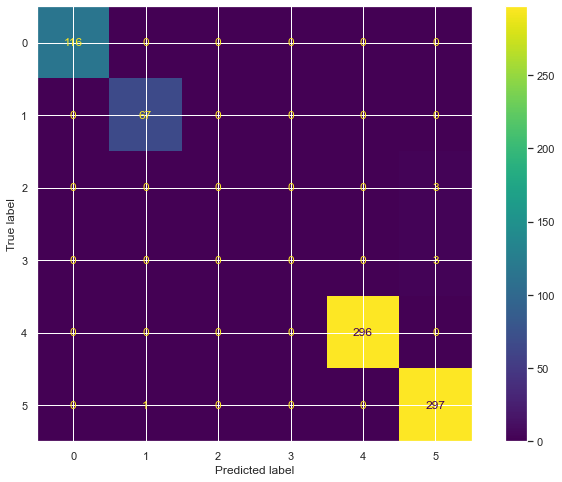

In [897]:
# Plot the confusion matrix 
cm = confusion_matrix(y_se_test,y_se_predict, labels=model_selected_baseline.classes_)

# ploting with labels
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_selected_baseline.classes_)
sns.set(rc={'figure.figsize':(12,8)})
disp_cm.plot()


In [898]:
# Printing Classification Report of the Model. 
print(classification_report(y_se_test, y_se_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       0.99      1.00      0.99        67
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00       296
           5       0.98      1.00      0.99       298

    accuracy                           0.99       783
   macro avg       0.66      0.67      0.66       783
weighted avg       0.98      0.99      0.99       783



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Step 7:  Building Improved Model. 
#### Step 7.1 : Finding out the Best combination of the hyperparameters. 
#### Step 7.2 : Using the combination of Hyperparameters with best result to build the Improved Model. 

In [899]:
# Finding the Best Combination of the Hyperparameters supplied.

from itertools import product

#Hyperparameters List
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]

# Looping through all the combination of Hpyperparameters. 
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RFC(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=100)
    rf.fit(X_se_train, y_se_train)
    prediction_test = rf.predict(X_se_test)
    
    # Printing the accuracy with each combinations.
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_se_test,prediction_test)))
    
    

Classification accuracy on test set with max features = 1 and max_depth = None: 0.991
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.931
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.992
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.992
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.992
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.991
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.992
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.991
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.991
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.991
Classification accuracy on test set with max features = log2 and max_depth = None: 0.991
Classification accuracy on test set with max features = log2

### Step 7.2:  Creating final model based on above hyperparameters with best score

In [900]:
# Final_rf_Model with hyperparameters.
Final_rf_Model =RFC(n_estimators=100, 
                                criterion='entropy', 
                                max_features='log2', 
                                max_depth=2, 
                                n_jobs=2,
                                random_state=100)
# Train the model
Final_rf_Model.fit(X_se_train, y_se_train)





RandomForestClassifier(criterion='entropy', max_depth=2, max_features='log2',
                       n_jobs=2, random_state=100)

In [901]:
#Testing the Model.
prediction_test = Final_rf_Model.predict(X_se_test)

# printing the accuracy of the model
print("The Final Model Effeciency is: {}".format(accuracy_score(y_se_test, prediction_test)))

The Final Model Effeciency is: 0.9923371647509579


### Evaluating Improved Model 

In [902]:
# Printing classification Report:
print(classification_report(y_se_test, prediction_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00        67
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00       296
           5       0.98      1.00      0.99       298

    accuracy                           0.99       783
   macro avg       0.66      0.67      0.67       783
weighted avg       0.98      0.99      0.99       783



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [903]:
# Accuracy on Training
print("Training Accuracy is: ", Final_rf_Model.score(X_se_train, y_se_train))
# Accuracy on Testing
print("Testing Accuracy is: ", Final_rf_Model.score(X_se_test, y_se_test))


Training Accuracy is:  0.9919011082693947
Testing Accuracy is:  0.9923371647509579


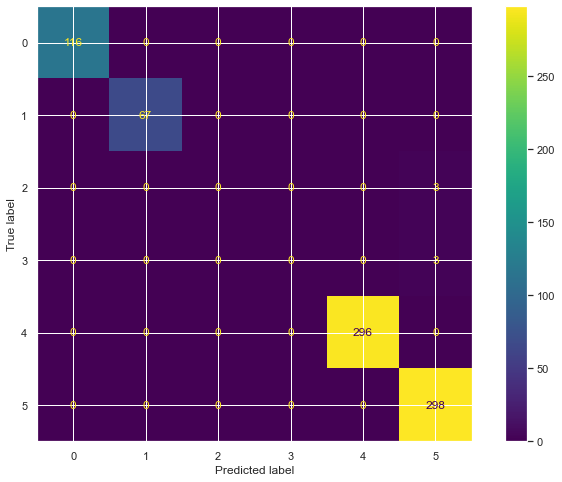

In [904]:
# Plot the confusion matrix 
cm = confusion_matrix(y_se_test,prediction_test, labels=Final_rf_Model.classes_)

# ploting with labels
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Final_rf_Model.classes_)
sns.set(rc={'figure.figsize':(12,8)})
disp_cm.plot()


## Conclusion: 

* <b><i> After testing and evaluating both Baseline and Improved Model, We can see that the Improved Model ( Final_rf_Model) has the better accuracy compared to Baseline Model. Hence, we can Reject the Baseline Model in favour of Improved Model. 

## **** End of File *** 